This quick example will explore another possible use case of the `nasapy` library by finding and downloading all of the available images provided by the [NASA Astronomy Picture of the Day](https://apod.nasa.gov/apod/astropix.html) service. 

Before starting, import the libraries that we will be using, including `nasapy`. [`IPython.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?highlight=display#IPython.display.Image) is imported to view some of the images that we will download.

In [1]:
import nasapy
import os
import pandas as pd
import datetime
import urllib.request
from IPython.display import Image

The NASA APOD (Astronomy Picture of the Day) API endpoint requires a registered API key to be included in the request. To receive an API key, an account can be created at the [NASA API](https://api.nasa.gov/) website. A `DEMO_KEY` can also be passed instead of an actual key, though the request limit is greatly restricted. We initialize the `Nasa` class from `nasapy` with the key received from creating an account.

In [2]:
key = os.environ.get('NASA_KEY')
n = nasapy.Nasa(key=key)

Before downloading the images available in 2019, we need to get the dates in 2019! Because typing 365 days worth of strings into a list would be quite tedious, we instead leverage `pandas'` [`date_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html) function in combination with a few other pandas methods to get a list of all dates in 2019.

In [3]:
dates_2019 = pd.date_range(end = '2019-12-31', periods=365).to_pydatetime().tolist()
print(len(dates_2019))

365


The NASA APOD API endpoint only gives us the URLs of the available image for a given date; thus, we first loop through all the dates in the `dates_2019` list and get the available image URL. The API endpoint also provides a URL link for a high-definition image if one is available.

In [4]:
urls = []

for date in dates_2019:
    apod = n.picture_of_the_day(date, hd=True)
    
    if apod['media_type'] == 'image':
        if 'hdurl' not in apod.keys():
            apod['hdurl'] = None

        urls.append({'date': apod['date'], 
                     'title': apod['title'], 
                     'sd': apod['url'], 
                     'hd': apod['hdurl']})

After getting all the available URLs, we can print the length to see how many days of images we were able to extract.

In [5]:
print(len(urls))

332


We can now begin downloading the images! To separate the standard and high-definition images, we first create two directories using the [`makedirs`](https://docs.python.org/3/library/os.html) function from the `os` standard library. The [`urlretrieve`](https://docs.python.org/3/library/urllib.request.html) function from `urllib.request` is used to download the images into the relevant directories. The downloaded images are each named according to their title, the image quality, and the date.

In [6]:
sd_dir = 'apod/sd'
hd_dir = 'apod/hd'

os.makedirs(sd_dir)
os.makedirs(hd_dir)

for img in urls:   
    urllib.request.urlretrieve(img['sd'], 
                               os.path.join(sd_dir, 
                                            img['title'].lower().replace(' ', '_').replace('/', '-') + 
                                            '_sd_' + img['date'].replace(' ', '_')) + '.jpg')
    
    if img['hd'] is not None:
        urllib.request.urlretrieve(img['hd'], 
                                   os.path.join(hd_dir, 
                                                img['title'].lower().replace(' ', '_').replace('/', '-') + 
                                                '_hd_' + img['date'].replace(' ', '_')) + '.jpg')

After the images are all downloaded into their respective directories, we can get a list of all the high-definition images using the `os` function [`listdir`](https://docs.python.org/3/library/os.html#).

In [7]:
hd_images = os.listdir(hd_dir)

Combining the relative path directory to the high-definition image location and the first image in the list using `os.path.join`, we can view the first image downloaded into the directory!

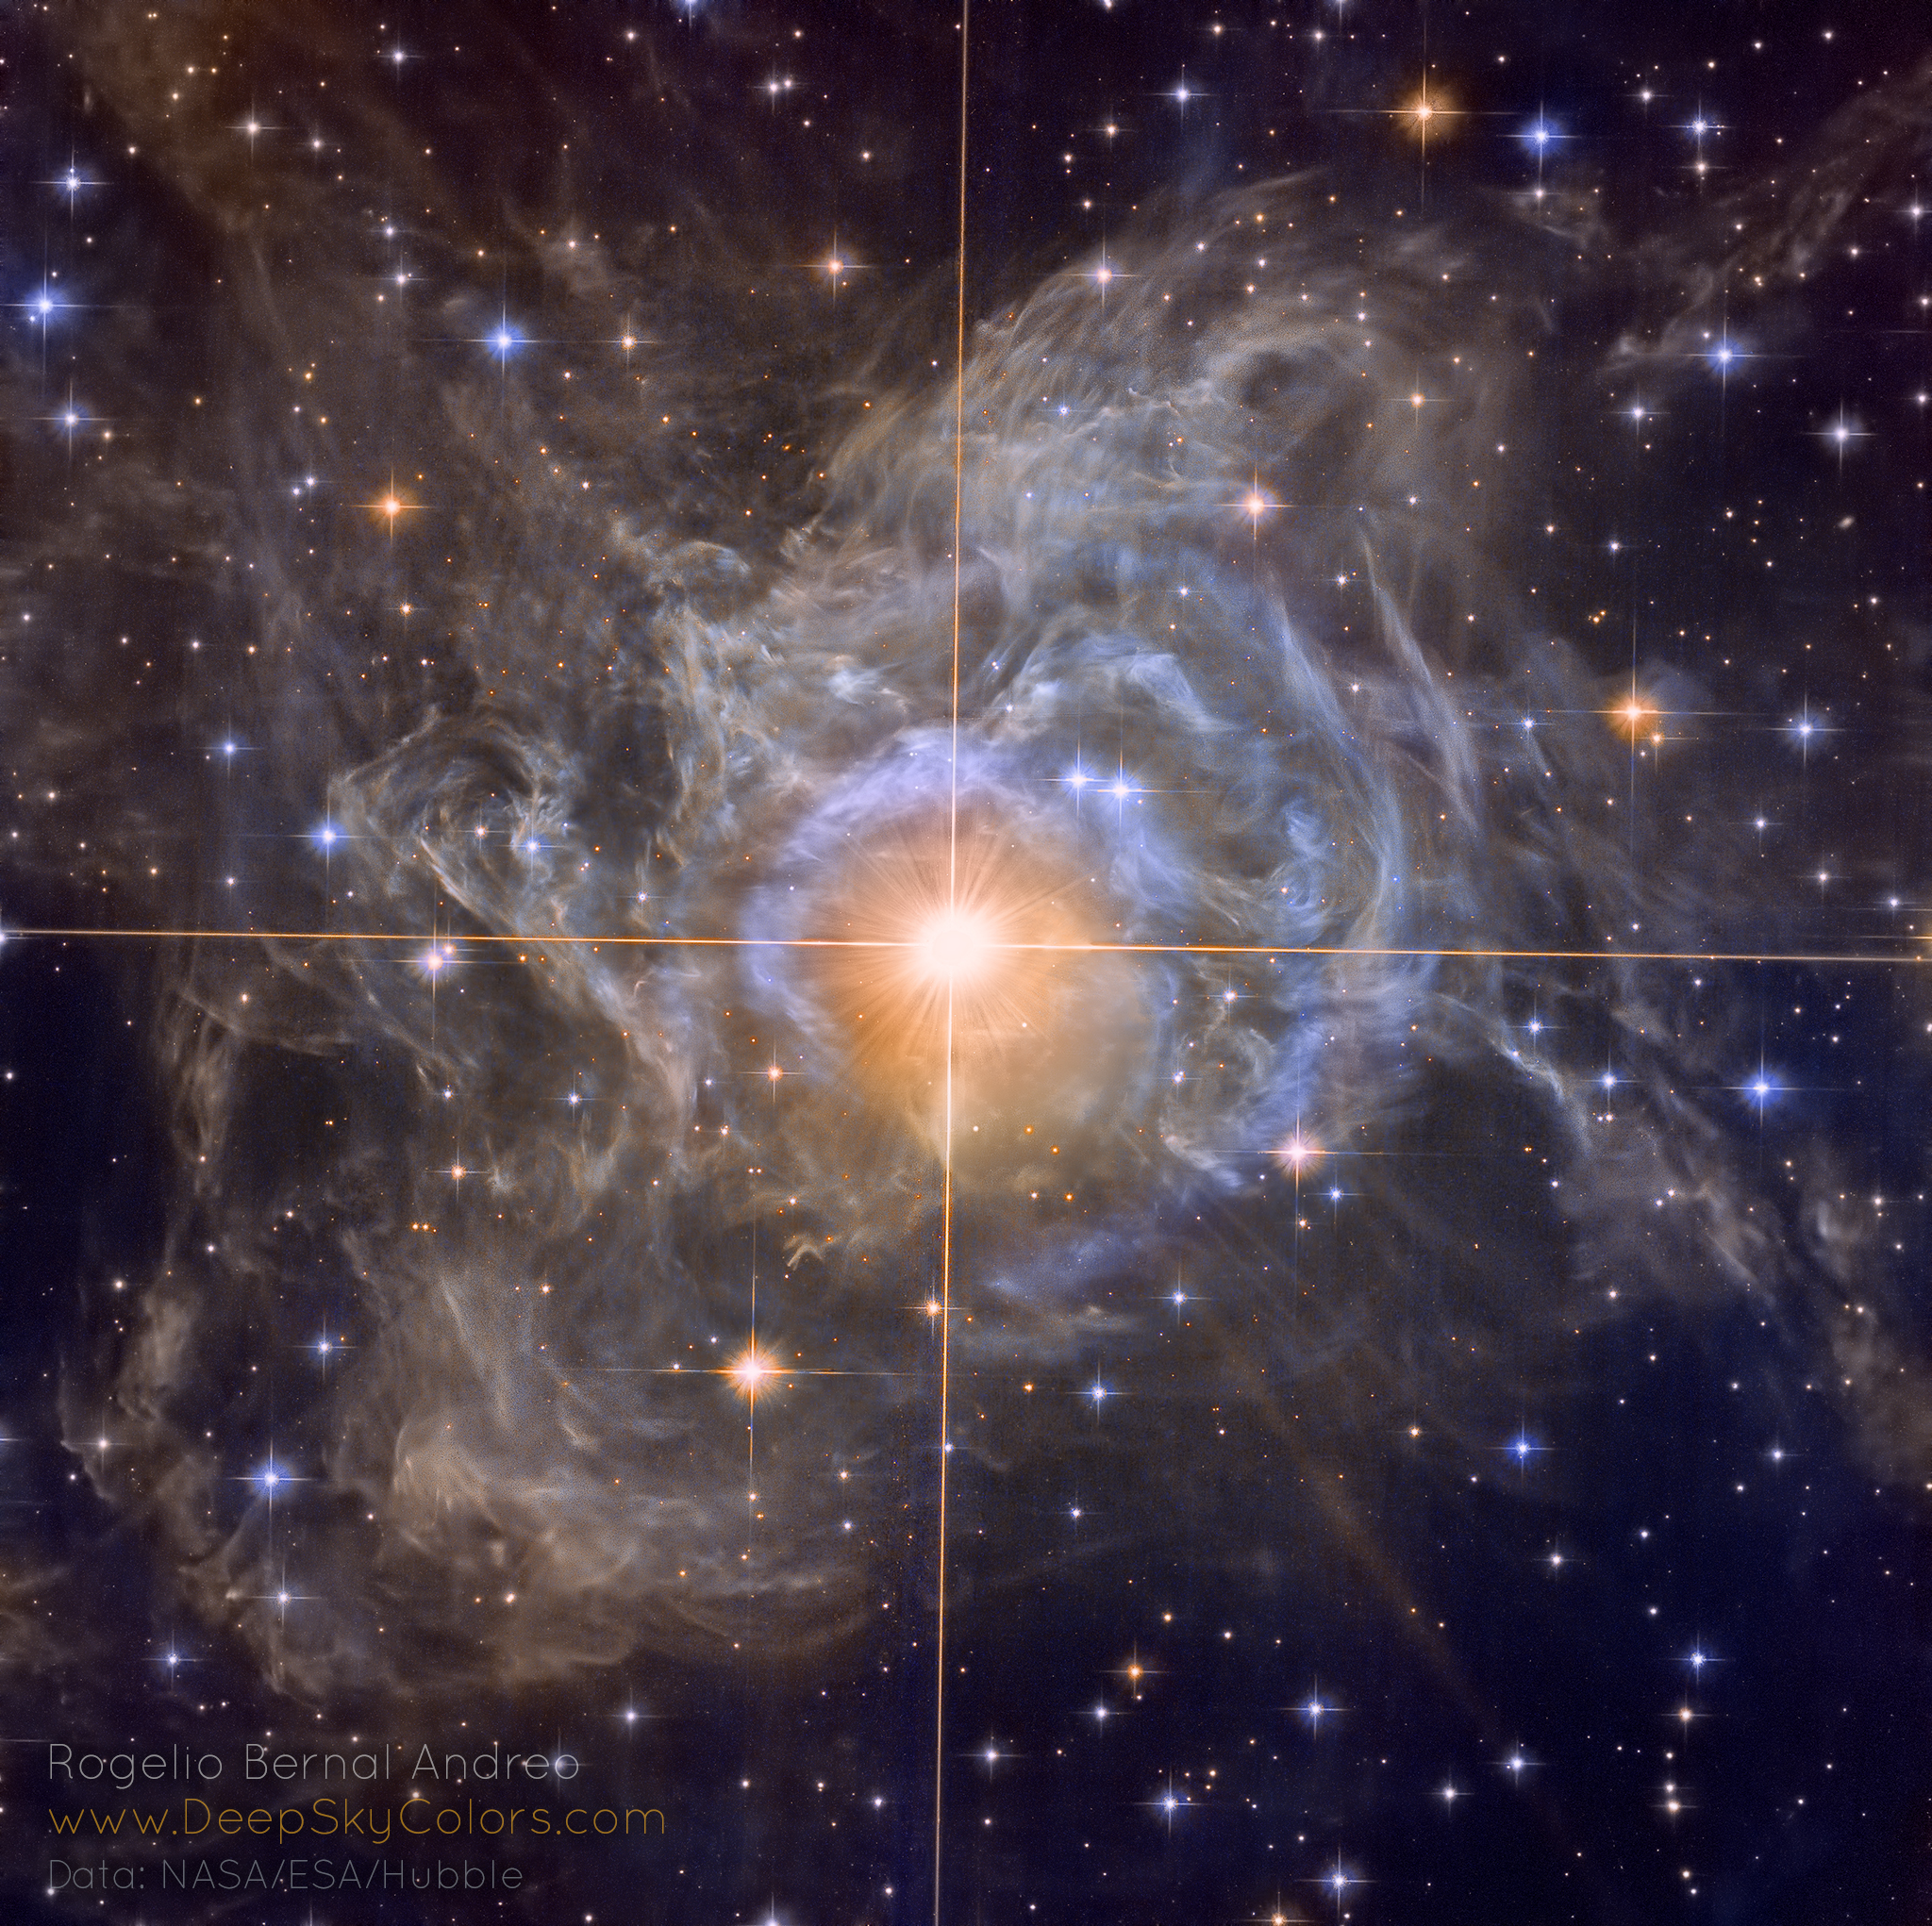

In [14]:
Image(os.path.join(hd_dir, hd_images[0]), width=480, height=480)

Beautiful! Space and astronomy genuinely are gorgeous. As we downloaded so many different images, it might be hard to decide on which one to view, so we leverage the [`randint`](https://docs.python.org/3/library/random.html) function to load a random image from the directory.

In [16]:
from random import randint

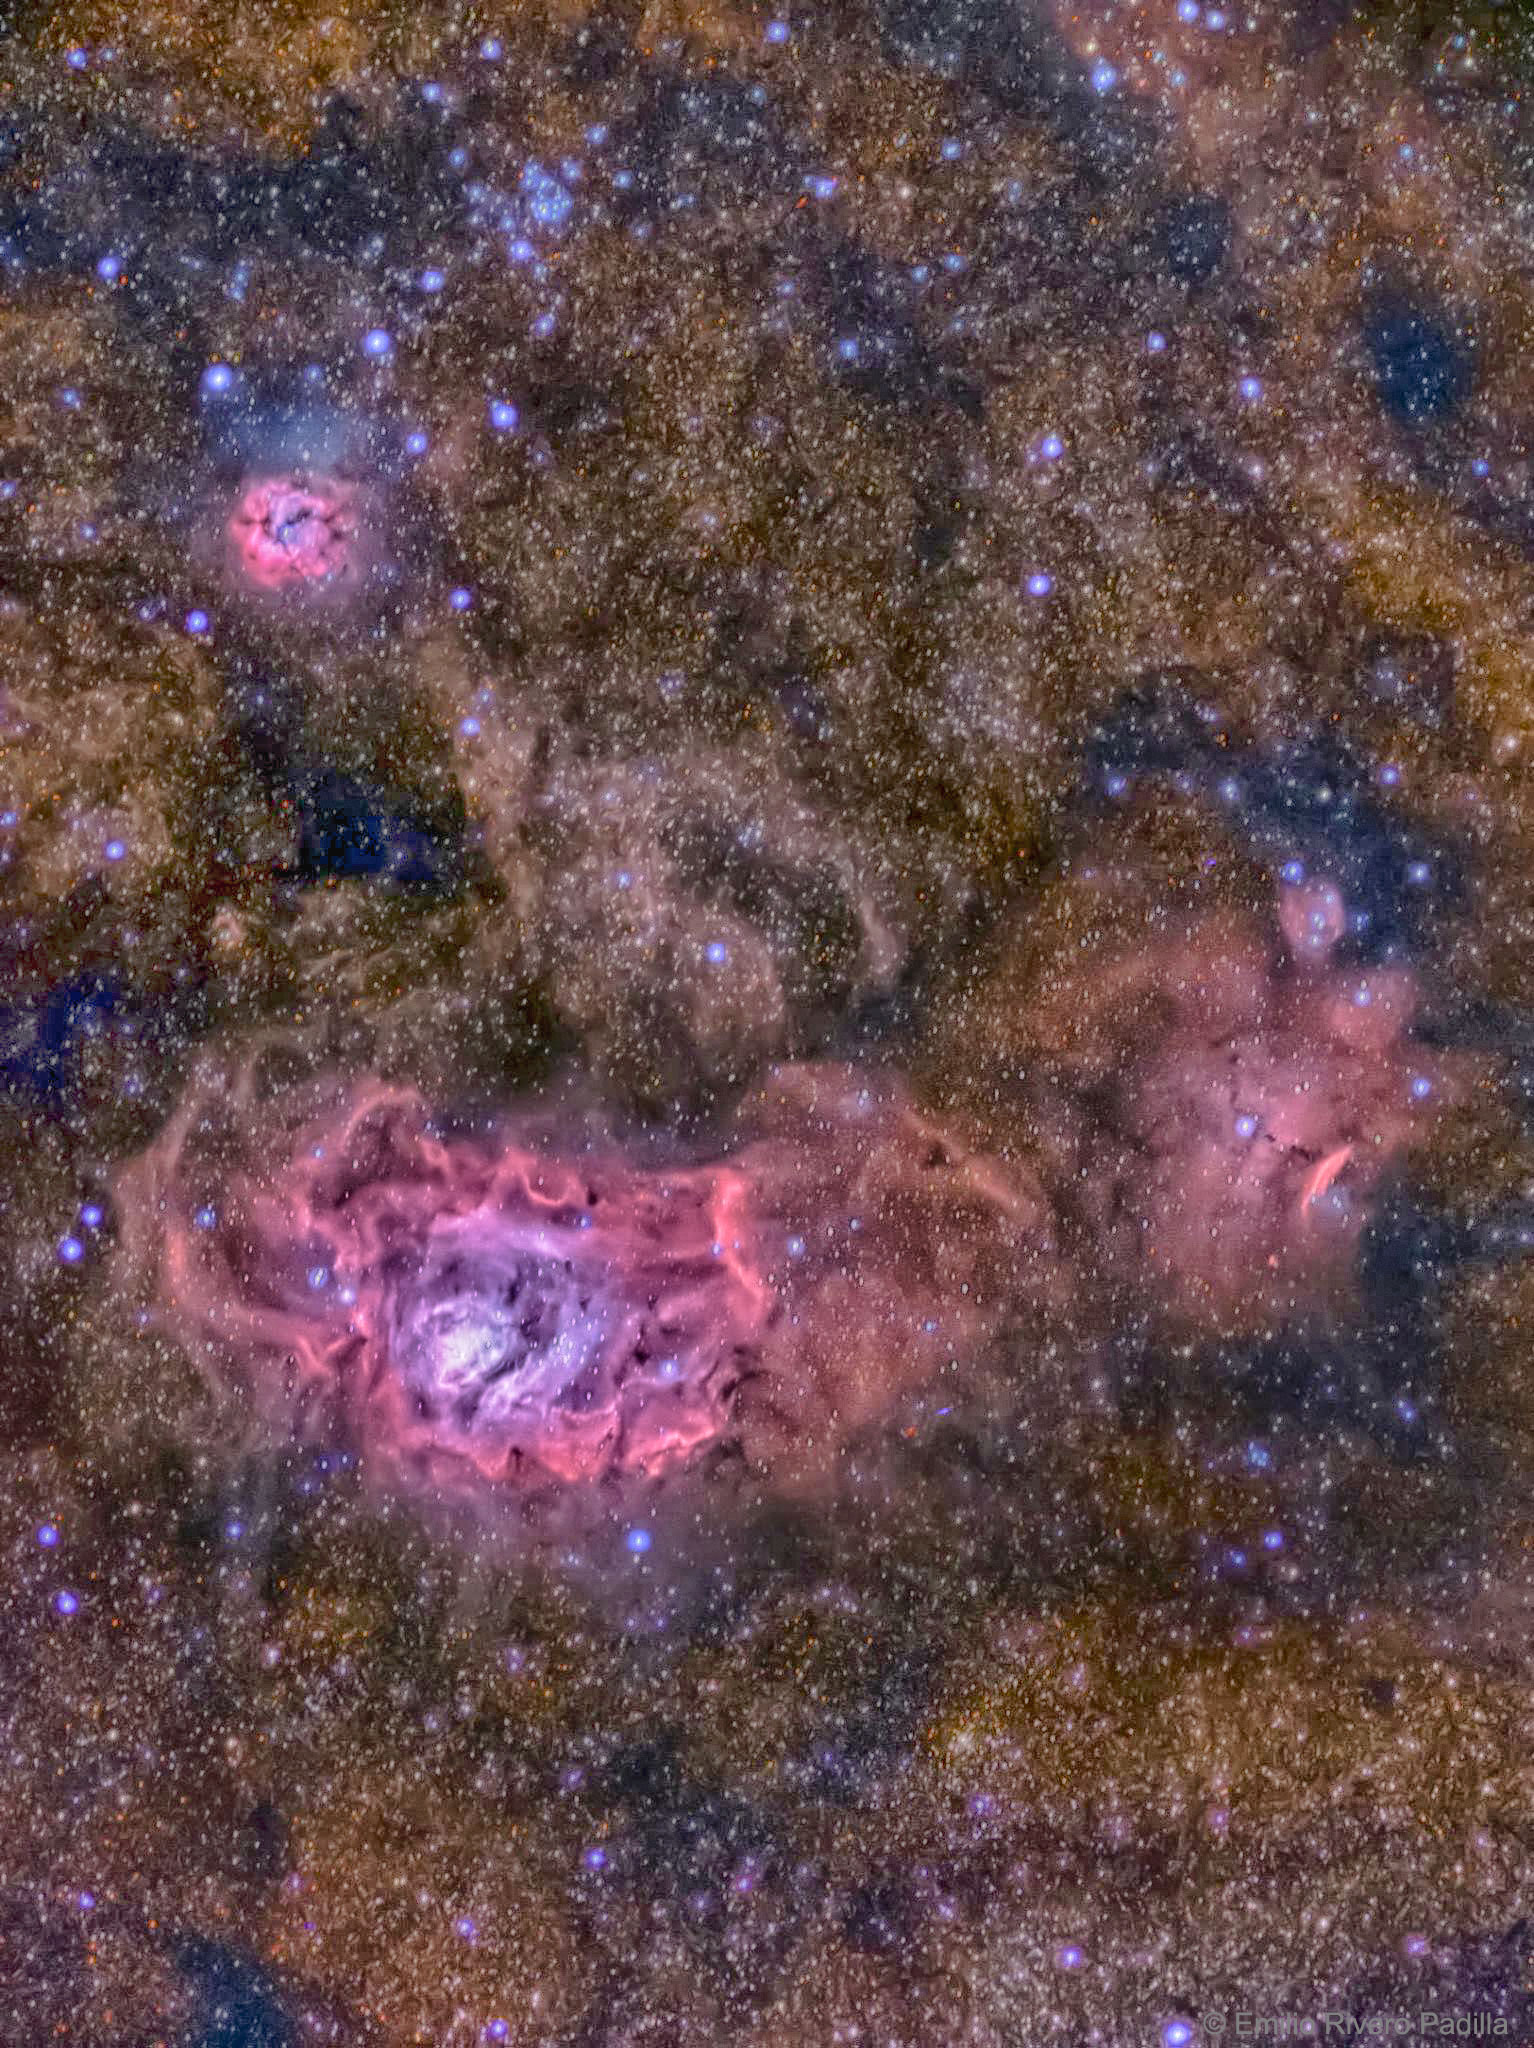

In [19]:
Image(os.path.join(hd_dir, hd_images[randint(0, len(hd_images))]), width=480, height=480)